# Hyperparameter Optimization

In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import numpy as np
import pandas as pd

### Get the dataset: make moons from sklearn 🌙

In [2]:
X, y = make_moons(n_samples=200, noise=0.3)

In [4]:
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

<AxesSubplot:>

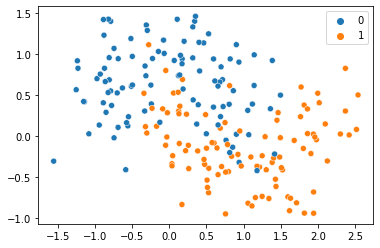

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

# Example: Random Forest  🌲🌳

In [6]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [8]:
xtrain.shape, ytrain.shape

((150, 2), (150,))

In [19]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=2) 

In [14]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=5)

In [21]:
rf.score(xtrain, ytrain)

0.9133333333333333

In [22]:
sum(cross_val_score(rf, xtrain, ytrain))/5

0.8266666666666665

## Grid Search  🕵️‍♀️

Instead of trying out different hyperparameters and -values manually, we can use a Grid Search, where we provide a dictionary with parameters that will be "searched" for the best model. 

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = { 'n_estimators': [5, 20, 50, 100],
              'max_depth' : [None, 3, 10, 20],
              'min_samples_split' : [2, 3, 5]} # 48 models 

In [25]:
rf_opti = RandomForestClassifier()

In [28]:
gridsearch = GridSearchCV(rf_opti, param_grid, verbose=True)

In [29]:
gridsearch.fit(xtrain, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 10, 20],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [5, 20, 50, 100]},
             verbose=True)

### Inspecting the results

In [30]:
gridsearch.best_params_

{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 5}

In [31]:
gridsearch.best_score_

0.8533333333333333

In [33]:
results = pd.DataFrame(gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008344,0.000854,0.001389,0.000275,None,2,5,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.900000,0.766667,0.766667,0.733333,0.866667,0.806667,0.064636,43
1,0.024620,0.001117,0.002516,0.000318,None,2,20,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.866667,0.800000,0.733333,0.800000,0.866667,0.813333,0.049889,38
2,0.059508,0.002522,0.005052,0.000540,None,2,50,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.833333,0.833333,0.733333,0.866667,0.800000,0.813333,0.045216,38
3,0.122477,0.010443,0.010190,0.001970,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.833333,0.833333,0.733333,0.833333,0.866667,0.820000,0.045216,33
4,0.010217,0.002563,0.001341,0.000191,None,3,5,"{'max_depth': None, 'min_samples_split': 3, 'n...",0.800000,0.700000,0.766667,0.766667,0.866667,0.780000,0.054160,47
5,0.036568,0.006220,0.003066,0.000482,None,3,20,"{'max_depth': None, 'min_samples_split': 3, 'n...",0.866667,0.833333,0.700000,0.900000,0.866667,0.833333,0.069921,12
6,0.062216,0.002042,0.004888,0.000382,None,3,50,"{'max_depth': None, 'min_samples_split': 3, 'n...",0.866667,0.866667,0.700000,0.866667,0.833333,0.826667,0.064636,23
7,0.124467,0.007626,0.009770,0.000771,None,3,100,"{'max_depth': None, 'min_samples_split': 3, 'n...",0.866667,0.800000,0.700000,0.866667,0.866667,0.820000,0.065320,33
8,0.006472,0.000322,0.001006,0.000131,None,5,5,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.733333,0.766667,0.800000,0.833333,0.833333,0.793333,0.038873,46
9,0.024709,0.000722,0.002517,0.000341,None,5,20,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.866667,0.800000,0.700000,0.866667,0.833333,0.813333,0.061824,38


## Making predictions with the best model

In [34]:
rf_best = gridsearch.best_estimator_

In [35]:
rf_best.predict(xtest)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0])

## How does this work in a pipline? 
Define the parameter-grid using the name of the step in the pipeline that you want to tune, then the double underscores, then name of parameter. 

In [36]:
pipe = Pipeline([
    ('polynomials', PolynomialFeatures(degree=2)),
    ('RandomForest', RandomForestClassifier())
])

In [37]:
param_grid = {'RandomForest__n_estimators': [5, 10, 25, 50],   # name has to be in this format: modelname__hyperparametername
              'RandomForest__max_depth' : [3, 5, 10, 20],
              'RandomForest__min_samples_split' : [2, 3, 5, 10]}

grid = GridSearchCV(pipe, param_grid=param_grid)

In [ ]:
# do the same thing as above from here on: .fit, .best_params,....

In [38]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=Pipeline(steps=[('polynomials', PolynomialFeatures()),
                                       ('RandomForest',
                                        RandomForestClassifier())]),
             param_grid={'RandomForest__max_depth': [3, 5, 10, 20],
                         'RandomForest__min_samples_split': [2, 3, 5, 10],
                         'RandomForest__n_estimators': [5, 10, 25, 50]})

In [40]:
grid.best_params_

{'RandomForest__max_depth': 5,
 'RandomForest__min_samples_split': 2,
 'RandomForest__n_estimators': 10}

## Alternative: Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rcv = RandomizedSearchCV(rf_opti, {'n_estimators': range(100),
                             'max_depth' : [3, 5, 10, 20, 50],
                             'min_samples_split' : [2, 3, 5, 10]}
                             )

In [ ]:
rcv.fit(X, y)
rcv.score(X, y)

In [ ]:
rcv.best_params_

# Exercise: 

- Apply Gridsearch on your project: see ⭐️-challenge in Course Material 3.8